<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/5_Optimal_Skills.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# What is the most optimal skill to learn for Data Analysts based from their demand and salary?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize salary and count of skills in demand
3. (Optional) Determine if certain technologies are more prevalent

## Import Libraries and Data

Import the libraries, data and change the `job_posted_date` to a datetime type.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_SGPH = df[(df['job_country'] == 'Singapore') | (df['job_country'] == 'Philippines')].copy()\
df_SGPH_DA = df_SGPH[df_SGPH['job_title_short'].isin(['Data Analyst'])]

## Clean Data

Drop NaN values from the 'salary_year_avg' column. Then use `explode` method on the `job_skills` column to create a new row in a new DataFrame (`df_DA_US_exploded`) for each skill associated with a job. Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [9]:
df_SGPH_DA_exploded = df_SGPH_DA.explode('job_skills')

In [ ]:
## Assign the SG PH Data analyst data that are not null on salary year avg column
SGPH_DA_salary = df_SGPH_DA_exploded[df_SGPH_DA_exploded[['salary_year_avg']].notnull().all(1)]

In [102]:
## Drop duplicate value
SGPH_DA_salary.loc[SGPH_DA_salary.duplicated()]

In [124]:
## Convert salary_year_avg column to SGD currency from PHP
SGPH_DA_salary.reset_index(inplace=True)
SGPH_DA_salary.loc[SGPH_DA_salary['job_country'] == 'Philippines', 'salary_year_avg'] = SGPH_DA_salary['salary_year_avg'] * 12 / 43
SGPH_DA_salary

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11,115695,Data Analyst,Data Analyst (Procurement/Logistics),"Tarlac City, Tarlac, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-08-25 08:14:55,False,False,Philippines,year,31025.581395,NaN,Pilmico Foods Corporation,excel,"{'analyst_tools': ['excel', 'tableau']}"
12,115695,Data Analyst,Data Analyst (Procurement/Logistics),"Tarlac City, Tarlac, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-08-25 08:14:55,False,False,Philippines,year,31025.581395,NaN,Pilmico Foods Corporation,tableau,"{'analyst_tools': ['excel', 'tableau']}"
19,147342,Data Analyst,Data Management Assistant ( Stay-in Set-up),"Tarlac City, Tarlac, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-02-07 08:16:41,False,False,Philippines,year,14065.116279,NaN,Pilmico Foods Corporation,None,None
22,166142,Data Analyst,"Data Analyst, Customer Experience","Manila, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-03-03 15:19:36,True,False,Philippines,year,31025.581395,NaN,Dialpad,sql,"{'other': ['flow'], 'programming': ['sql']}"
23,166142,Data Analyst,"Data Analyst, Customer Experience","Manila, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-03-03 15:19:36,True,False,Philippines,year,31025.581395,NaN,Dialpad,flow,"{'other': ['flow'], 'programming': ['sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,777328,Data Analyst,Data Product Manager,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-04 05:15:58,False,False,Philippines,year,18083.720930,NaN,Angkas,sql,"{'analyst_tools': ['tableau', 'looker', 'power..."
166,777328,Data Analyst,Data Product Manager,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-04 05:15:58,False,False,Philippines,year,18083.720930,NaN,Angkas,tableau,"{'analyst_tools': ['tableau', 'looker', 'power..."
167,777328,Data Analyst,Data Product Manager,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-04 05:15:58,False,False,Philippines,year,18083.720930,NaN,Angkas,looker,"{'analyst_tools': ['tableau', 'looker', 'power..."
168,777328,Data Analyst,Data Product Manager,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-04 05:15:58,False,False,Philippines,year,18083.720930,NaN,Angkas,power bi,"{'analyst_tools': ['tableau', 'looker', 'power..."


## Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [128]:
SGPH_DA_skills = df_SGPH_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
SGPH_DA_skills = SGPH_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})


,skill_count,median_salary
job_skills,,
sql,29,98500.0
python,19,100500.0
excel,17,100500.0
tableau,16,100500.0
r,12,100500.0
power bi,9,75000.0
aws,5,100500.0
spark,5,149653.0
word,5,100500.0


In [133]:
SGPH_DA_skills.reset_index(inplace=True)

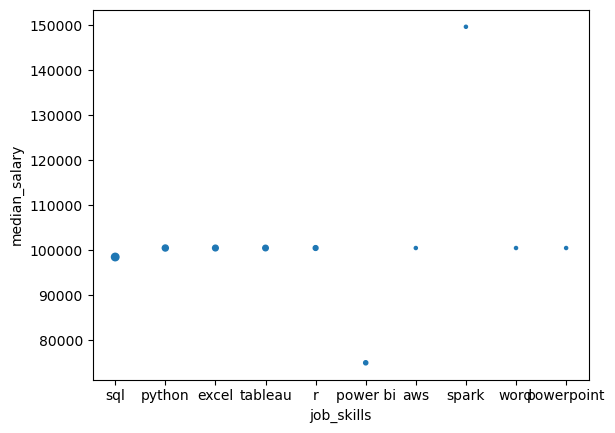

In [144]:
### Optimal skills to learn relative to their median salary
SGPH_DA_skills.head(10).plot.scatter(x='job_skills', y='median_salary', s='skill_count')
plt.show()